<a href="https://colab.research.google.com/github/sirischuck/HW1/blob/main/HW1_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

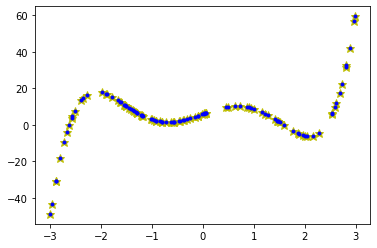

(6,)
The MSE over the training data is 2.747798860642571e-26


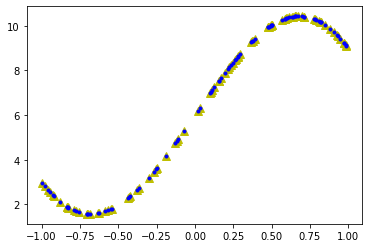

The MSE over the test data is 3.235585380752034e-26


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt



x_train= np.load('/content/drive/MyDrive/x_train.npy')
y_train= np.load('/content/drive/MyDrive/y_train.npy')



#passes the training data through the basis functions x,x^2...x^5
xTrainBasis = np.array([[x**i for i in range(0,6)] for x in x_train[:,0]])


#calulate the transpose once and save it because it's used twice for the normal equation
xTrainBasisT=np.transpose(xTrainBasis)

#big ugly normal equation written out in python
theta= np.dot(np.dot(np.linalg.inv(np.dot(xTrainBasisT,xTrainBasis)),xTrainBasisT),y_train)

#calculates the prediction for the y test values based on the model
yTrainPred=np.dot(xTrainBasis,theta)

#plot the prediction and the actual test data
plt.plot(x_train,y_train, 'y*', markersize=9)
plt.plot(x_train,yTrainPred,'b.')
plt.show()


#calculate and show the MSE between the training data and the model
error=0
for (yG,y) in zip(y_train,yTrainPred):
  error= error + (yG-y)**2
print('The MSE over the training data is', error/len(yTrainPred))


#load the test data
x_test=np.load('/content/drive/MyDrive/x_test.npy')
y_test=np.load('/content/drive/MyDrive/y_test.npy')


#generate the test predictions
yTestPred=np.array([np.polyval(np.flipud(theta), x) for x in x_test])

#plot the test predictions and actual test data
plt.plot(x_test,y_test,'y^', markersize=8)
plt.plot(x_test,yTestPred,'b.')
plt.show()

#calculate the MSE between the training data and the model
error=0
for (y,yP) in zip(y_test,yTestPred):
  error= error + (yP-y)**2
print('The MSE over the test data is', error[0]/len(yTestPred))





 

In [135]:
import numpy as np
import csv
import matplotlib.pyplot as plt

with open("/content/drive/MyDrive/Assignment1_Q2_Data.csv", 'r') as file:

  csvreader = csv.reader(file)
  next(csvreader)
  
  i=0
  houseDataTrain=[]
  houseDataTest=[]
  priceDataTrain=[]
  priceDataTest=[]
  
  for row in csvreader:

    houseToAppend=[float(elm) for elm in row[1:-1]]
    priceToAppend=[float(row[-1])]
    houseToAppend.append(float(1))

    if(i%2!=0):
      houseDataTrain.append(houseToAppend)
      priceDataTrain.append(priceToAppend)
    else:
      houseDataTest.append(houseToAppend)
      priceDataTest.append(priceToAppend)

    i+=1

  houseDataTrain=np.array(houseDataTrain)
  priceDataTrain=np.array(priceDataTrain)
  houseDataTest=np.array(houseDataTest)
  priceDataTest=np.array(priceDataTest)
  

  #calulate the transpose once and save it because it's used twice for the normal equation
  houseDataTrainT=np.transpose(houseDataTrain)

  #big ugly normal equation written out in python
  theta= np.dot(np.dot(np.linalg.inv(np.dot(houseDataTrainT,houseDataTrain)),houseDataTrainT),priceDataTrain)

  #calculates the prediction for the y test values based on the model
  priceTrainPred=np.dot(houseDataTrain,theta)

  avg=np.array([sum(houseDataTrain[:,i]) for i in range(len(houseDataTrain[0]))])
  avg=avg/len(houseDataTrain)
  #print (avg)
  
  squareError=0
  percentError=0



  for (y,yP) in zip(priceDataTrain,priceTrainPred):
    squareError= squareError + abs((yP-y))
    percentError= percentError+ ((yP-y)/y)

  print(squareError/len(priceDataTrain))
  print(percentError/len(priceDataTrain))


  squareError=0
  percentError=0

  print(avg*theta )


  priceTestPred=np.dot(houseDataTest,theta)


  for (y,yP) in zip(priceDataTest,priceTestPred):
    squareError= squareError + abs((yP-y))
    percentError= percentError+ ((yP-y)/y)

  print(squareError/len(priceDataTrain))
  print(percentError/len(priceDataTrain))



[1.313378]
[0.00122913]
[7.59264799]
[0.01046505]


In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math

def weightMat(point, X): 
    
  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.
    tau=.5
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w


x_train= np.load('x_train.npy')
y_train= np.load('y_train.npy')



#load the test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')


x_train_biased=np.append(x_train,np.ones((len(x_train),1)),axis=1)
x_test_biased=np.append(x_test,np.ones((len(x_test),1)),axis=1)

x_train_trans=np.transpose(x_train_biased)

y_test_pred=[]

for querry in x_test_biased:
  weights=weightMat(querry,x_train_biased)

  

  theta = np.linalg.inv(np.dot(np.dot(x_train_biased.T,weights),x_train_biased))

  theta3=np.dot(weights,y_train)

  theta2=np.dot(x_train_biased.T,theta3)

  theta = np.dot(theta,theta2)


  y_test_pred.append(np.dot(theta,querry))



print(np.array(y_test_pred).shape)

plt.plot(x_test,y_test_pred,'*')

plt.plot(x_test,y_test,'*')

plt.show()


  








ValueError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


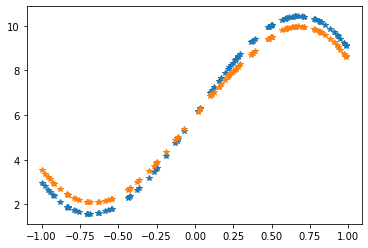

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import math


def wm(point, X, tau): 
    
  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w


def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
   ## # Just one parameter: theta, that's why adding a column of ones        #### to X and also adding a 1 for the point where we want to          #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    w = wm(point_, X_, tau) 

    y=np.reshape(y,(100,1))

  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

  
x_train= np.load('x_train.npy')
y_train= np.load('y_train.npy')


#load the test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')

y_pred=[]


for x in x_test:
  y_pred.append(predict(x_train,y_train,x,.2)[1])


plt.plot(x_test,y_test, '*')

y_pred=np.reshape(y_pred,(100))



plt.plot(x_test,y_pred,'*')

